# <span style="color:blue">**Capítulo 6**</span>
## <font color=blue size=8> K-Nearest Neighbors </font>
### <font color=blue> Un Algoritmo de Aprendizaje Supervisado para Clasificación y Que Puede Ser Regresión </font>

En este capítulo, aprenderás el uso de otro importante algoritmo de *machine learning* que es K vecinos más cercanos.

## En Pocas Palabras

Permíteme explicarlo con un ejemplo trivial. Imagina que conoces a una nueva persona. Con una breve duda, dices que es chino. ¿Cómo concluyes tan fácilmente que la persona es de origen chino? Con tu conocimiento previo de la anatomía humana de personas de diferentes orígenes, tomas esta decisión. Básicamente, intentas igualar las características distintas de su cuerpo con todas las características de personas previamente conocidas. Por ejemplo, puedes mirar sus ojos, su complexión, altura, tono de piel, y así sucesivamente. Si muchas de estas características se acercan a la categoría de personas que conocías previamente como chinas, concluyes que esta nueva persona es muy probablemente china.

Usamos una lógica similar en K vecinos más cercanos. Para calcular la similitud de características, debemos representar cada una de estas características en valores numéricos. Las características como peso y altura son numéricas. Pero, ¿qué pasa con los ojos? Podemos convertirlas en valores numéricos considerando la altura/ancho de un ojo en lugar de decir que el ojo es grande o pequeño. Así, si puedes convertir esas características “importantes” en datos numéricos, puedes usar el algoritmo K vecinos más cercanos para entrenar la máquina. Luego podemos usar un modelo de *ML* entrenado de esta manera para clasificación y *clustering*. Aunque esta discusión se refiere solo a clasificación, podemos usar el algoritmo incluso para resolver problemas de regresión. Nota que este es un algoritmo de aprendizaje supervisado, por lo que necesitarás un conjunto de datos etiquetado.
Con esta visión general del algoritmo, veamos sus detalles.

## K vecinos más cercanos

KNN es uno de los algoritmos más fáciles de implementar. El algoritmo almacena todos los datos y clasifica un nuevo punto de datos en función de su similitud con otros puntos de datos. Aunque lo usamos principalmente para clasificación, también podemos usarlo para análisis de regresión. Es un algoritmo no paramétrico en el sentido de que no hace suposiciones sobre los datos subyacentes.

El diagrama muestra el resultado de la clasificación KNN. Dado un conjunto de puntos de datos (artículos de noticias), clasifica los documentos en tres categorías: deportes, política y finanzas. Esto se muestra en la Fig. 6.1.

<div>
  <img src="content/fig6.1.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 6.1</p>

<p>Vecinos cercanos y lejanos—el punto negro se clasifica como finanzas.</p>

Ten en cuenta que debemos convertir los documentos de texto en vectores antes de que puedan introducirse en el algoritmo. Después de clasificar el conjunto de datos de entrenamiento en diferentes categorías, la categoría de un punto de datos no visto puede determinarse encontrando su cercanía a los puntos de datos vecinos. Por ejemplo, el punto de datos en cuestión (rectángulo negro) tiene tres puntos azules cercanos y dos puntos rojos, seguidos por un punto verde en ese orden. Como el número de puntos azules es mayor en comparación con los otros dos, el punto de datos se clasificaría como perteneciente al grupo azul, es decir, la categoría de finanzas. Ahora te mostraré el algoritmo.

## Algoritmo KNN

- Paso 1: Cargar los datos.  
- Paso 2: Inicializar K con el número elegido de vecinos, cinco como ejemplo.  
- Paso 3: Para cada punto de datos en el conjunto de datos:  
  - Calcular su distancia desde cada otro punto en todo el conjunto de datos.  
  - Almacenar la distancia y el índice de cada elemento (punto de datos) en una colección ordenada.  
- Paso 4: Ordenar la colección en orden ascendente de distancias.  
- Paso 5: Tomar las primeras K entradas de la colección ordenada.  
- Paso 6: Obtener las etiquetas de las K entradas seleccionadas.  
- Paso 7: Para clasificación, usar el valor de la moda estadística de las K etiquetas seleccionadas como predicción. Para regresión, usar la media estadística.  

Ahora te mostraré el funcionamiento de este algoritmo con algunas ilustraciones.

## Funcionamiento de KNN

Considera nuestro ejemplo anterior de identificar el origen de una persona examinando sus cuatro características: diámetro del ojo, altura, peso y complexión. La tabla 6.1 muestra los datos etiquetados de muestra.

| Diámetro del ojo (pulgadas) | Altura (pies) | Peso (libras) | Complexión (claridad) | Origen     |
|------------------------------|---------------|---------------|------------------------|------------|
| 0.8                          | 6.2           | 176.4         | 1                      | Americano  |
| 0.6                          | 5             | 143.3         | 0.9                    | Japonés    |
| 1                            | 5.6           | 165.3         | 0.5                    | Indio      |
| 0.5                          | 4.10          | 110.2         | 0.8                    | Chino      |
| 0.9                          | 6             | 156.4         | 1                      | Británico  |
| 1                            | 6.5           | 220.5         | 0                      | Africano   |
| 0.9                          | 6.2           | 198.4         | 0.8                    | Australiano |

<p style="color:blue; margin-top: 5px; font-weight: bold;">Tabla 6.1</p>

<p>Conjunto de datos de muestra para KNN.</p>

Ahora, considera que deseas identificar a la persona con el siguiente punto de datos:

| 0.9 | 6.2 | 198.4 | 0.8 | Desconocido |


Ahora calcularás la distancia euclidiana de esta persona desconocida con cada otra persona en el conjunto de datos. La figura 6.2 muestra el cálculo para la primera persona.

<div>
  <img src="content/fig6.2.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 6.2</p>

<p>Cálculos de distancia euclidiana para el primer punto de datos.</p>

La figura 6.3 muestra el cálculo de la segunda persona.

<div>
  <img src="content/fig6.3.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 6.3</p>

<p>Cálculos de distancia euclidiana para el segundo punto de datos.</p>

Ahora, tienes una colección no ordenada de distancias euclidianas de todos los puntos de datos como se muestra en la tabla 6.2.

| Punto | Distancia Euclidiana |
|-------|--------------------|
| E1    | 484.05             |
| E2    | 3037.55            |
| E3    | 1096.07            |
| E4    | 7783.81            |
| E5    | 1764.53            |
| ...   | 1796.18            |

<p style="color:blue; margin-top: 5px; font-weight: bold;">Tabla 6.2</p>

<p>Distancias euclidianas de todos los puntos de datos.</p>

Ordena esta colección en orden descendente. La salida ordenada se muestra en la tabla 6.3.

| Punto | Distancia Euclidiana |
|-------|--------------------|
| E4    | 7783.81            |
| E2    | 3037.55            |
| En    | 1796.18            |
| E5    | 1764.53            |
| E3    | 1096.07            |
| E1    | 484.05             |

<p style="color:blue; margin-top: 5px; font-weight: bold;">Tabla 6.3</p>

<p>Distancias euclidianas ordenadas.</p>

Ahora, toma las 5 entradas principales. ¿Por qué 5? Porque queremos considerar las 5 predicciones principales. En otras palabras, queremos establecer K = 5. Te explicaré qué sucede cuando tomas un valor diferente para K. ¿Cuál es el voto mayoritario (moda en términos estadísticos) entre estas 5 entradas principales? Es E3. ¿Cuál es la clase de E3? Es Indio. Por lo tanto, puedes concluir que la persona desconocida es de origen indio. Así es como funciona el algoritmo KNN.

También puedes usar KNN para análisis de regresión. Aquí, usarás el valor promedio de las K entradas principales como tu salida predicha. Ahora te explicaré qué sucede cuando seleccionas un valor diferente para K.

## Efecto de K

Considera la siguiente representación visual, como se muestra en la figura 6.4, de un punto de datos desconocido en un grupo de puntos de datos conocidos.

<div>
  <img src="content/fig6.4.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 6.4</p>

<p>Efecto de K en la determinación de clases.</p>

Como se observa en la figura 6.4, si tomas el valor de K = 5, hay dos objetos rojos (clase B) y tres objetos azules (clase A) en las cercanías del objeto desconocido. Por lo tanto, clasificarás el objeto desconocido como de tipo clase A, considerando el voto mayoritario o el valor de la moda en términos estadísticos. Sin embargo, si tomas K igual a 10, tendrás 6 objetos rojos (clase B) y 4 objetos azules (clase A). Aquí, clasificarás el objeto desconocido como de tipo clase B (rojo). Así, puedes ver cómo la clasificación puede variar dependiendo de la selección de K.
Ahora discutiré las ventajas y desventajas del algoritmo KNN.

## Ventajas

Aquí están algunas de las ventajas:  
- Simple de implementar  
- Robusto frente a datos de entrenamiento ruidosos.
- Puede ser más efectivo para conjuntos de datos grandes.

## Desventajas

Aquí hay dos desventajas principales de KNN:  
- La selección adecuada del valor de K puede ser complicada.
- El costo de cálculo es alto, ya que necesitas calcular la distancia entre el punto desconocido y todos los demás puntos en todo el conjunto de datos.

### ### Implementación

La librería *sklearn* proporciona la implementación del algoritmo KNN en *sklearn.neighbors.KNeighborsClassifier*. Al clasificar, implementa el voto de los k vecinos más cercanos. La clase se declara de la siguiente manera:

In [53]:
# class sklearn.neighbors.KNeighborsClassifier (n_neighbors=5, *, 
#                                              weights='uniform', 
#                                              algorithm='auto',
#                                              leaf_size=30,
#                                              p=2,
#                                              metric='minkowski',
#                                              metric_params=None,
#                                              n_jobs=None)

Cuando creas una instancia de la clase, necesitarás establecer valores para estos parámetros (o aceptar los valores por defecto). El parámetro *n_neighbors* decide el número de vecinos que se usarán durante la votación. El parámetro *weights* determina si todos los puntos en cada vecindario tienen el mismo peso o si los vecinos más cercanos tendrán mayor influencia que aquellos que están más alejados. También puedes proporcionar una función definida por el usuario como argumento para tener control sobre quién es tu vecino. El parámetro *algorithm* te da la opción de elegir el algoritmo a usar, que puede ser *BallTree*, *KDTree* o búsqueda por fuerza bruta. El valor por defecto para este parámetro es *auto*, que intenta encontrar el algoritmo más apropiado para tu conjunto de datos. Por lo tanto, rara vez necesitarás configurarlo por tu cuenta. Para otros parámetros, simplemente puedes aceptar sus valores por defecto.

 En última instancia, como científico de datos, solo necesitas establecer el valor de *n_neighbors*. La pregunta es cómo decidir el valor óptimo de este parámetro. Para entender esto y cómo se aplica KNN, presentaré un ejemplo de la vida real.

## Proyecto

Clasificar los datos de diagnóstico médico de miles de personas en categorías diabéticas y no diabéticas puede ayudar a los profesionales médicos en la detección temprana de la diabetes en sus pacientes. Afortunadamente, el *National Institute of Diabetes and Digestive and Kidney Diseases* ha puesto a disposición de *machine learning* una base de datos de este tipo. Aplicaremos nuestro algoritmo KNN sobre este conjunto de datos para clasificar la información en dos categorías.

El conjunto de datos que voy a usar es un subconjunto de la base de datos más grande y contiene puntos de datos pertenecientes a mujeres de herencia Pima India mayores de 21 años. El [conjunto de datos](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) contiene muchos parámetros importantes, como el número de embarazos previos, IMC, nivel de insulina, edad, entre otros. Por lo tanto, se trata de un conjunto de datos multifactorial con dos categorías de salida.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Carga del Conjunto de Datos

El conjunto de datos consiste en varias variables predictoras médicas y una variable objetivo, *Outcome*. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, entre otros. El objetivo del conjunto de datos es predecir diagnósticamente si una paciente tiene diabetes o no, basándose en estas mediciones diagnósticas.

Carga los datos en un *dataframe* de *Pandas* y obtén su información usando el siguiente código:

In [55]:
df = pd.read_csv('content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


La información del conjunto de datos se puede ver en la figura 6.5.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 6.5</p>

<p>Información del conjunto de datos.</p>

La columna *Outcome* es nuestra columna objetivo, y el resto de las columnas serán nuestras características. Además, observa que tenemos solo 768 puntos de datos. Con 8 predictores, un número mayor de puntos de datos habría ayudado a obtener una mejor precisión en los algoritmos KNN.

Ahora extraemos características y objetivos en los *dataframes* X y y.

In [57]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

Dividimos todo el conjunto de datos en entrenamiento y prueba usando el método *train_test_split* de *sklearn*.

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

Reservamos el 20% de los datos para pruebas. En este punto, no estamos listos para entrenar nuestro algoritmo KNN. Primero, determinaremos el valor óptimo de K.

### Determinación del K Óptimo

Para determinar el valor óptimo de K, usamos un truco simple. Aplicamos el clasificador sobre el mismo conjunto de datos con diferentes valores de K. Usamos los valores por defecto para todos los demás parámetros del clasificador. Hacemos esto utilizando el siguiente fragmento de código:

In [59]:
# Configurar arreglos para almacenar las precisiones de entrenamiento y prueba
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Configurar un clasificador KNN con k vecinos
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Ajustar el modelo
    knn.fit(X_train, y_train)
    
    # Calcular la precisión en el conjunto de entrenamiento
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Calcular la precisión en el conjunto de prueba
    test_accuracy[i] = knn.score(X_test, y_test)

Luego, graficamos las precisiones para su visualización. Una de estas gráficas se muestra en la figura 6.6.

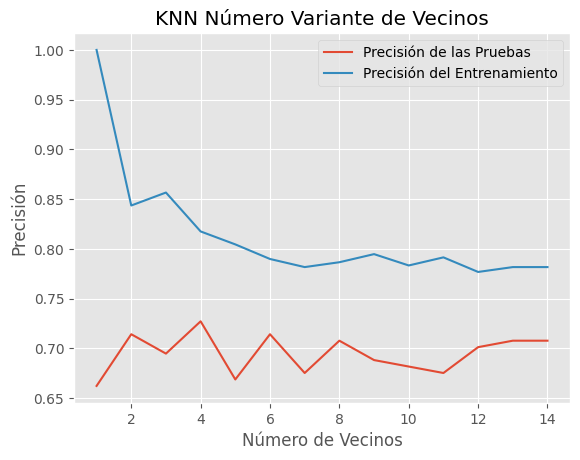

In [60]:
plt.title('KNN Número Variante de Vecinos')
plt.plot(neighbors, test_accuracy, label='Precisión de las Pruebas')
plt.plot(neighbors, train_accuracy, label='Precisión del Entrenamiento')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Precisión')
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 6.6</p>

<p>Precisión vs. número de vecinos para KNN.</p>

Se observa que la precisión en el conjunto de datos de entrenamiento comienza a estabilizarse con K = 4, aunque en los datos de prueba todavía aparecen algunas irregularidades. Tomaremos K = 4 para nuestro entrenamiento final.

### Entrenamiento del Modelo

Podemos ver que k = 4 da un modelo generalizado y, por lo tanto, usaremos k = 4 para construir nuestro modelo final. Creamos el clasificador con K=4.

In [61]:
# Configurar un clasificador KNN con k vecinos
knn = KNeighborsClassifier(n_neighbors=4)

Entrenamos el modelo con todo el conjunto de datos.

In [62]:
# Ajustar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Verificamos la precisión del modelo. La salida es:

In [63]:
knn.score(X_test,y_test)

0.7272727272727273

La precisión no es muy buena, principalmente debido al número limitado de puntos de datos que tenemos en este conjunto de datos.

### Prueba del Modelo

Evaluamos el rendimiento del modelo en los datos de prueba llamando a su método *predict* y luego graficando la matriz de confusión. Aquí está la salida:

In [64]:

y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[90, 10],
       [32, 22]])

In [65]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,90,10,100
1,32,22,54
All,122,32,154


También puedes imprimir el informe de clasificación completo para examinar las diferentes métricas como precisión, *recall*, *f1-score* y soporte. El informe de clasificación se muestra en la figura 6.7.

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.69      0.41      0.51        54

    accuracy                           0.73       154
   macro avg       0.71      0.65      0.66       154
weighted avg       0.72      0.73      0.71       154



Ahora describiré algunas áreas de aplicación donde puedes usar este algoritmo.

## ¿Cuándo Usar?

Existen varios dominios y casos de uso donde el algoritmo KNN se ha aplicado con éxito. Lo usamos para estimar la puntuación crediticia de un nuevo solicitante basándonos en la información de los acreedores anteriores. Se utiliza para determinar los valores atípicos en sistemas de detección de fraude con tarjetas de crédito. Lo usamos para identificar documentos semánticamente similares, donde cada documento se considera un vector para *machine learning*. También podemos usarlo para la categorización de textos, que es un problema de clasificación. Aunque KNN no es adecuado para datos de alta dimensionalidad, podemos usarlo para crear una línea base en sistemas de recomendación.

Otro ejemplo de su uso como clasificador: considera el caso de identificar campos en una hoja de MS Excel. Diferentes personas en una organización envían una hoja de Excel similar donde los nombres de los campos difieren en cierta medida. KNN puede detectar automáticamente la similitud de los datos en dichos campos y agruparlos juntos. Esta es una técnica muy útil, ya que la mayoría de las veces los usuarios de hojas de Excel no siguen una plantilla específica. Esto puede ser muy útil al realizar transformaciones de datos.

Para darte un ejemplo de análisis de regresión, podemos usar KNN para estimar el peso de una persona dado su altura y edad, encontrando los k vecinos más cercanos y luego aplicando el valor promedio de la edad a este objeto desconocido.

## Resumen

El algoritmo KNN utiliza medidas de similitud para decidir sobre los k vecinos más cercanos. Después de almacenar las medidas de similitud para cada punto de datos, podemos clasificar un punto de datos no visto como de un tipo determinado basándonos en su similitud con los demás puntos de datos en todo el conjunto. Has estudiado la implementación de este algoritmo en *sklearn*. El único parámetro que necesitas considerar al usar el algoritmo es el valor de *k-neighbors*. Has aprendido una técnica para determinar un valor óptimo para este *k-neighbor*.